# Extraccion de variables en datos vectoriales

In [14]:
library(sf)
library(geojsonsf)
library(geojsonio)
library(geojson)
library(dplyr)
library(raster)

In [15]:
setwd(r"(C:\Users\GEOMATICA\Curso_suelo\02_Prediccion_Suelo_Multiespectral\Datos\Tabla)")

In [16]:
# Crear lista del directorio
lista_csv <- list.files(path = getwd(), pattern = "*Datos")
lista_csv

[1] "Datos_Suelo.csv"

In [17]:
CSV = read.csv2(lista_csv[1],sep = ";")

In [18]:
head(CSV)

,ID,ESTE,NORTE,pH,CE,MO,N,P,K,Ca,Mg,Al,CICe,BT,SAl,Arena,Limo,Arcilla
,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,512538,9056311,4.32,1.2,1.48,0.07,27.91,0.21,0.26,0.02,1.9,2.38,0.48,79.69,62.9,16.16,20.94
2,2,512126,9057087,5,0.13,2.29,0.11,2.28,0.18,1.67,0.83,1.1,3.77,2.67,29.14,54.9,20.16,24.94
3,3,512766,9056489,4.58,0.16,1.61,0.08,3.68,0.16,0.17,0.04,2.1,2.47,0.37,85.09,62.9,16.16,20.94
4,4,513263,9055598,4.55,0.1,2.15,0.11,2.92,0.12,1.48,0.39,3.1,5.08,1.98,60.97,36.9,32.16,30.94
5,5,512480,9056451,4.71,0.35,2.42,0.12,2.41,0.15,1.67,0.69,3.4,5.91,2.51,57.5,44.9,20.16,34.94
6,6,513006,9056074,5.21,0.17,1.61,0.08,4.57,0.14,1.19,0.37,0.4,2.1,1.7,19.07,66.9,14.16,18.94


In [19]:
ROI <- st_as_sf(CSV, coords = c("ESTE", "NORTE"), crs=32718)

In [20]:
# Informacion de la tabla de atributo del shp
print(ROI)

Simple feature collection with 60 features and 16 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 511953 ymin: 9055598 xmax: 513309 ymax: 9057120
Projected CRS: WGS 84 / UTM zone 18S
First 10 features:
   ID   pH   CE   MO    N     P    K   Ca   Mg  Al CICe   BT   SAl Arena  Limo
1   1 4.32  1.2 1.48 0.07 27.91 0.21 0.26 0.02 1.9 2.38 0.48 79.69  62.9 16.16
2   2    5 0.13 2.29 0.11  2.28 0.18 1.67 0.83 1.1 3.77 2.67 29.14  54.9 20.16
3   3 4.58 0.16 1.61 0.08  3.68 0.16 0.17 0.04 2.1 2.47 0.37 85.09  62.9 16.16
4   4 4.55  0.1 2.15 0.11  2.92 0.12 1.48 0.39 3.1 5.08 1.98 60.97  36.9 32.16
5   5 4.71 0.35 2.42 0.12  2.41 0.15 1.67 0.69 3.4 5.91 2.51  57.5  44.9 20.16
6   6 5.21 0.17 1.61 0.08  4.57 0.14 1.19 0.37 0.4  2.1  1.7 19.07  66.9 14.16
7   7 4.66 0.06 1.75 0.09  1.65 0.16 0.82 0.23 3.8    5  1.2 76.05 45.77 23.66
8   8 5.36 0.18 0.94 0.05  1.14 0.07 1.66  0.2 0.2 2.13 1.93  9.39 67.77 13.66
9   9 4.89 0.15 1.48 0.07  1.52 0.08 0.54 0.11 0.7 1.43 0.73 49.02 5

In [21]:
head(ROI, 4)

,ID,pH,CE,MO,N,P,K,Ca,Mg,Al,CICe,BT,SAl,Arena,Limo,Arcilla,geometry
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<POINT [m]>
1,1,4.32,1.2,1.48,0.07,27.91,0.21,0.26,0.02,1.9,2.38,0.48,79.69,62.9,16.16,20.94,POINT (512538 9056311)
2,2,5,0.13,2.29,0.11,2.28,0.18,1.67,0.83,1.1,3.77,2.67,29.14,54.9,20.16,24.94,POINT (512126 9057087)
3,3,4.58,0.16,1.61,0.08,3.68,0.16,0.17,0.04,2.1,2.47,0.37,85.09,62.9,16.16,20.94,POINT (512766 9056489)
4,4,4.55,0.1,2.15,0.11,2.92,0.12,1.48,0.39,3.1,5.08,1.98,60.97,36.9,32.16,30.94,POINT (513263 9055598)


In [22]:
# Agregar raster multibandas
Sent2 <- stack(r"(C:\Users\GEOMATICA\Curso_suelo\02_Prediccion_Suelo_Multiespectral\Datos\Satelite\Sentinel2\PUCALLPA_S2_20211022T151709_RS.tif)")

Warning message:
"[minmax] min and max values not available for all layers. See 'setMinMax' or 'global'"


Warning message in plot.sf(ROI, add = TRUE, col = "red", pch = 15, lwd = 3):
"ignoring all but the first attribute"


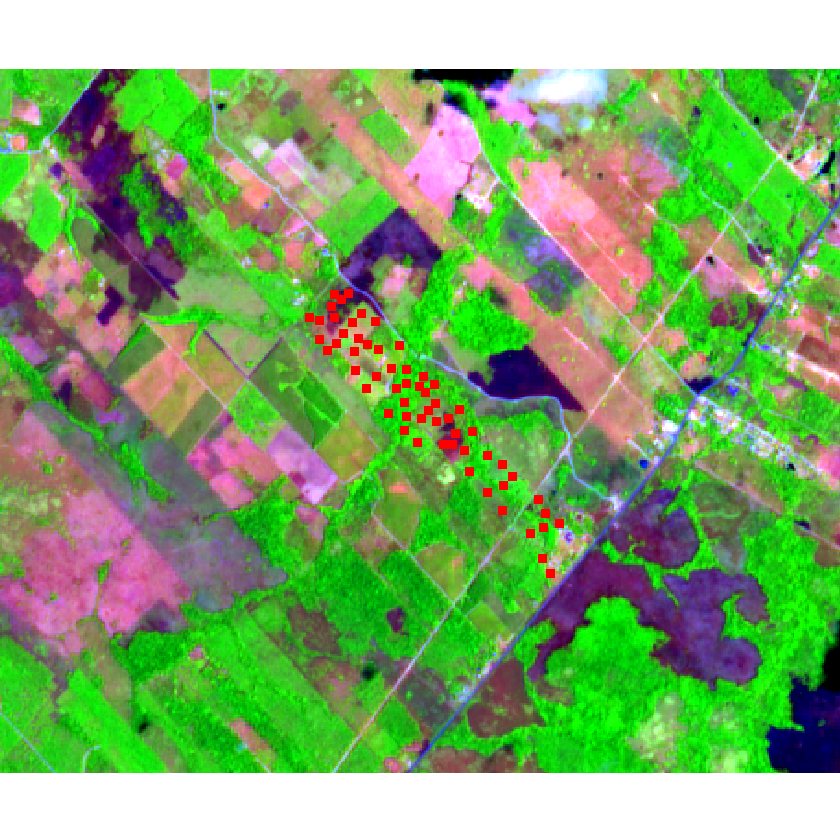

In [23]:
# Ploteamos la imagen y las puntos de muestreo
plotRGB(Sent2, 10,8,2, stretch="lin")
plot(ROI, add=TRUE, col="red",pch = 15, lwd=3)

In [24]:
# Cambiar directorio
setwd(r"(C:\Users\GEOMATICA\Curso_suelo\02_Prediccion_Suelo_Multiespectral\Datos\Satelite\Sentinel2\Bandas)")

In [25]:
# Crear lista del directorio
lista_datos <- list.files(path = getwd(), pattern = '.*tif$')
lista_datos

[1] "S2_01_B1.tif"      "S2_02_B2.tif"      "S2_03_B3.tif"     
 [4] "S2_04_B4.tif"      "S2_05_B5.tif"      "S2_06_B6.tif"     
 [7] "S2_07_B7.tif"      "S2_08_B8.tif"      "S2_09_B9.tif"     
[10] "S2_10_B11.tif"     "S2_11_B12.tif"     "S2_12_NGRDI.tif"  
[13] "S2_13_ExG.tif"     "S2_14_ExR.tif"     "S2_15_ExB.tif"    
[16] "S2_16_IKAW.tif"    "S2_17_GRRI.tif"    "S2_18_ExGR.tif"   
[19] "S2_19_GBDI.tif"    "S2_20_MGRVI.tif"   "S2_21_RGBVI.tif"  
[22] "S2_22_VDVI.tif"    "S2_23_VARI.tif"    "S2_24_RGRI.tif"   
[25] "S2_25_NGBDI.tif"   "S2_26_CIVE.tif"    "S2_27_NDVI.tif"   
[28] "S2_28_EVI.tif"     "S2_29_SAVI.tif"    "S2_30_MSAVI.tif"  
[31] "S2_31_NDWI.tif"    "S2_32_GNDVI.tif"   "S2_33_OSAVI.tif"  
[34] "S2_34_ARVI.tif"    "S2_35_SIPI.tif"    "S2_36_CGI.tif"    
[37] "S2_37_RVI.tif"     "S2_38_CVI.tif"     "S2_39_CCCI.tif"   
[40] "S2_40_RECI.tif"    "S2_41_SVI.tif"     "S2_42_SSI.tif"    
[43] "S2_43_SCI.tif"     "S2_44_SMI.tif"     "S2_45_MDE.tif"    
[46] "S2_46_slope.tif"   "S2_47_aspect.tif"  "S2_48_TPI.tif"    
[49] "S2_49_TRI.tif"     "S2_50_flowdir.tif" "S2_51__ACP_1.tif" 
[52] "S2_52__ACP_2.tif"  "S2_53__ACP_3.tif"

In [26]:
variables = stack(lista_datos)

In [27]:
names(variables)

[1] "S2_01_B1"      "S2_02_B2"      "S2_03_B3"      "S2_04_B4"     
 [5] "S2_05_B5"      "S2_06_B6"      "S2_07_B7"      "S2_08_B8"     
 [9] "S2_09_B9"      "S2_10_B11"     "S2_11_B12"     "S2_12_NGRDI"  
[13] "S2_13_ExG"     "S2_14_ExR"     "S2_15_ExB"     "S2_16_IKAW"   
[17] "S2_17_GRRI"    "S2_18_ExGR"    "S2_19_GBDI"    "S2_20_MGRVI"  
[21] "S2_21_RGBVI"   "S2_22_VDVI"    "S2_23_VARI"    "S2_24_RGRI"   
[25] "S2_25_NGBDI"   "S2_26_CIVE"    "S2_27_NDVI"    "S2_28_EVI"    
[29] "S2_29_SAVI"    "S2_30_MSAVI"   "S2_31_NDWI"    "S2_32_GNDVI"  
[33] "S2_33_OSAVI"   "S2_34_ARVI"    "S2_35_SIPI"    "S2_36_CGI"    
[37] "S2_37_RVI"     "S2_38_CVI"     "S2_39_CCCI"    "S2_40_RECI"   
[41] "S2_41_SVI"     "S2_42_SSI"     "S2_43_SCI"     "S2_44_SMI"    
[45] "S2_45_MDE"     "S2_46_slope"   "S2_47_aspect"  "S2_48_TPI"    
[49] "S2_49_TRI"     "S2_50_flowdir" "S2_51__ACP_1"  "S2_52__ACP_2" 
[53] "S2_53__ACP_3"

In [28]:
dim(variables)

[1] 383 456  53

## Extraer informacion raster en Vector

In [29]:
# Extraer los valores del raster a tabla
Extraer_RS <- extract(variables, ROI, sp = TRUE) # tenemos los valores Reflectancia Superficie
head(Extraer_RS)

,ID,pH,CE,MO,N,P,K,Ca,Mg,Al,⋯,S2_44_SMI,S2_45_MDE,S2_46_slope,S2_47_aspect,S2_48_TPI,S2_49_TRI,S2_50_flowdir,S2_51__ACP_1,S2_52__ACP_2,S2_53__ACP_3
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,4.32,1.2,1.48,0.07,27.91,0.21,0.26,0.02,1.9,⋯,3.237264,217.5808,4.058892,0.00000,0.21780168,0.5321983,64,-0.18855515,0.004775629,-0.007336683
2,2,5,0.13,2.29,0.11,2.28,0.18,1.67,0.83,1.1,⋯,1.267335,219.3033,2.129862,313.40308,0.04040952,0.3386931,16,0.19860272,-0.198087066,0.009015589
3,3,4.58,0.16,1.61,0.08,3.68,0.16,0.17,0.04,2.1,⋯,2.164745,215.5808,4.720323,16.81831,-0.33638239,0.6525297,64,-0.06107873,0.034771886,-0.015924960
4,4,4.55,0.1,2.15,0.11,2.92,0.12,1.48,0.39,3.1,⋯,1.627098,237.0000,1.200731,360.00000,0.15719832,0.1571983,64,0.08259204,0.108550020,-0.035339050
5,5,4.71,0.35,2.42,0.12,2.41,0.15,1.67,0.69,3.4,⋯,3.543492,217.7811,4.337925,68.29136,0.06544724,0.5926337,128,-0.15904658,0.050500572,-0.033408940
6,6,5.21,0.17,1.61,0.08,4.57,0.14,1.19,0.37,0.4,⋯,2.656441,228.9414,5.682575,209.31070,-0.03093096,0.7773618,8,-0.18136331,0.041864749,0.016451184


In [30]:
class(Extraer_RS)

[1] "SpatialPointsDataFrame"
attr(,"package")
[1] "sp"

In [31]:
df_Extrac_Banda = data.frame(Extraer_RS)

In [32]:
head(df_Extrac_Banda,4)

,ID,pH,CE,MO,N,P,K,Ca,Mg,Al,⋯,S2_47_aspect,S2_48_TPI,S2_49_TRI,S2_50_flowdir,S2_51__ACP_1,S2_52__ACP_2,S2_53__ACP_3,coords.x1,coords.x2,optional
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,1,4.32,1.2,1.48,0.07,27.91,0.21,0.26,0.02,1.9,⋯,0.00000,0.21780168,0.5321983,64,-0.18855515,0.004775629,-0.007336683,512538,9056311,TRUE
2,2,5,0.13,2.29,0.11,2.28,0.18,1.67,0.83,1.1,⋯,313.40308,0.04040952,0.3386931,16,0.19860272,-0.198087066,0.009015589,512126,9057087,TRUE
3,3,4.58,0.16,1.61,0.08,3.68,0.16,0.17,0.04,2.1,⋯,16.81831,-0.33638239,0.6525297,64,-0.06107873,0.034771886,-0.015924960,512766,9056489,TRUE
4,4,4.55,0.1,2.15,0.11,2.92,0.12,1.48,0.39,3.1,⋯,360.00000,0.15719832,0.1571983,64,0.08259204,0.108550020,-0.035339050,513263,9055598,TRUE


In [33]:
write.csv(df_Extrac_Banda, file = "Extraccion_indices.csv",
          fileEncoding = "UTF-8",row.names=FALSE)

In [34]:
writeRaster(variables, "S2_RGB_NIR_TOP_Total.tif", drivername="Gtiff", overwrite=TRUE)